<a href="https://colab.research.google.com/github/AchmadWibawa/PCVK/blob/master/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Achmad Wibawa / 01 / 2041720174 / TI 3B

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

In [19]:
# Membaca citra
img = cv.imread('/content/drive/MyDrive/PCVK/Images/morphology.png', cv.IMREAD_GRAYSCALE)

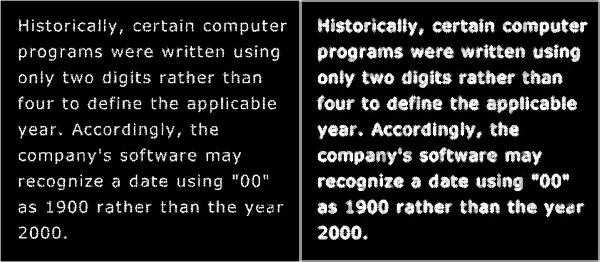

In [20]:
def dilasi(img, se):
    # Mendapatkan ukuran citra dan Structuring Element Dilasi
    height, width = img.shape[:2]
    se_height, se_width = se.shape[:2]
    se_center_y, se_center_x = se_height // 2, se_width // 2
    
    # Membuat citra output yang sama ukurannya dengan citra input
    output = np.zeros((height, width), dtype=np.uint8)
    
    # Melakukan dilasi pada setiap piksel di citra input
    for y in range(height):
        for x in range(width):
            # Memeriksa setiap piksel pada Structuring Element Dilasi
            max_val = 0
            for j in range(se_height):
                for i in range(se_width):
                    if se[j][i] != 0:
                        # Menghitung koordinat piksel pada citra input
                        input_y = y + (j - se_center_y)
                        input_x = x + (i - se_center_x)
                        # Memeriksa apakah koordinat piksel berada di dalam citra
                        if input_y >= 0 and input_y < height and input_x >= 0 and input_x < width:
                            # Memeriksa apakah nilai piksel lebih besar dari sebelumnya
                            if img[input_y][input_x] > max_val:
                                max_val = img[input_y][input_x]
            # Menetapkan nilai maksimum ke piksel pada citra output
            output[y][x] = max_val
    
    return output

# Menentukan Structuring Element Dilasi berbentuk cross 3 x 3
se = np.array([[0, 1, 0],
               [1, 1, 1],
               [0, 1, 0]], dtype=np.uint8)

# Melakukan dilasi pada citra menggunakan Structuring Element Dilasi yang telah ditentukan
output = dilasi(img, se)

final_frame = cv.hconcat((img, output))
cv2_imshow(final_frame)

## Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV.

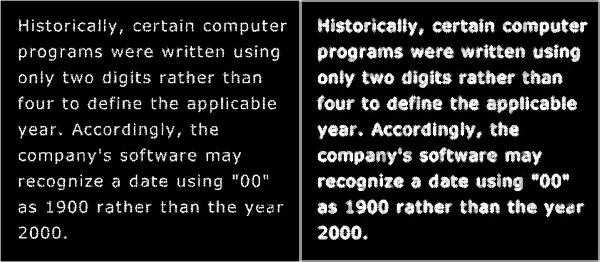

In [21]:
se = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))
output2 = cv.dilate(img, se)

final_frame = cv.hconcat((img, output2))
cv2_imshow(final_frame)

## Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV.